# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [9]:
df = pd.read_csv('C:/workspace/wassup3/05_Data_Analysis/data/mini.csv')

In [10]:
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [11]:
df.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [12]:
df.tail()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1
9999,e12dcb55,10,5,13.073230,28.120031,3,13,64.811297,4,5,Low,Premium,0,3,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [14]:
df.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [131]:
df.payment_pattern

0       5
1       6
2       7
3       0
4       0
       ..
9995    1
9996    7
9997    6
9998    0
9999    3
Name: payment_pattern, Length: 10000, dtype: int64

In [137]:
#결제패턴에 따른 구독지속여부 카운트 
df1 = df.groupby('payment_pattern')['target'].value_counts()


payment_pattern  target
0                1         807
                 0         468
1                1         783
                 0         502
2                1         747
                 0         459
3                1         763
                 0         467
4                1         753
                 0         461
5                1         750
                 0         488
6                1         801
                 0         467
7                1         795
                 0         489
Name: count, dtype: int64

In [58]:
pymt = df[['payment_pattern','subscription_duration', 'average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement','community_engagement_level']]
pymt

,payment_pattern,subscription_duration,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level
0,5,13,8.427187,18,16,68.360455,4
1,6,16,72.646087,16,13,97.567322,3
2,7,22,21.774492,13,14,94.358763,4
3,0,1,42.659066,19,18,70.153228,3
4,0,4,30.744287,19,10,81.917908,4
...,...,...,...,...,...,...,...
9995,1,22,84.053558,18,16,64.966803,5
9996,7,10,45.464833,9,8,82.750244,3
9997,6,7,127.302411,24,14,81.567839,5
9998,0,11,5.297234,10,10,89.885656,5


In [140]:
pymt1 = df.set_index('payment_pattern')
pymt1

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,target
payment_pattern,,,,,,,,,,,,,,
5,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,0
6,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,1
7,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,1
0,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,1
0,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1
7,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,1
6,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,1


In [178]:
df1 = pymt1.groupby(pymt1.index)[['target']].sum()
df1.rename(columns={'target': '구독O'}, inplace=True)
df1

,구독O
payment_pattern,
0,807
1,783
2,747
3,763
4,753
5,750
6,801
7,795


In [197]:
df1['총원']=pymt1.groupby(pymt1.index)[['target']].count()
df1['구독X'] = df1['총원']-df1['구독O']
df1['구독O-X'] = df1['구독O']-df1['구독X']
df1['구독비율']= df1['구독O'] / df1['총원'] * 100
df1

,구독O,구독X,구독O-X,총원,구독비율
payment_pattern,,,,,
0,807,468,339,1275,63.294118
1,783,502,281,1285,60.933852
2,747,459,288,1206,61.940299
3,763,467,296,1230,62.032520
4,753,461,292,1214,62.026359
5,750,488,262,1238,60.581583
6,801,467,334,1268,63.170347
7,795,489,306,1284,61.915888


(50.0, 65.0)

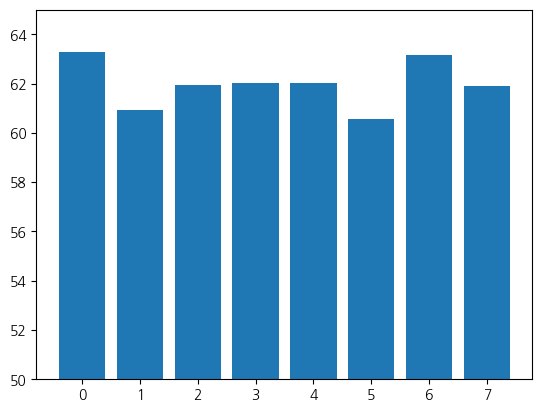

In [200]:
plt.bar(df1.index, df1['구독비율'])
plt.ylim(50,65)

In [207]:
df2 = pymt1.groupby(pymt1.index)[['recent_learning_achievement']].describe().round(2)
df2

recent_learning_achievement                              \
                                      count   mean    std    min    25%   
payment_pattern                                                           
0                                    1275.0  74.89   9.70  44.36  68.01   
1                                    1285.0  75.13   9.77  45.36  68.69   
2                                    1206.0  75.63  10.30  35.94  68.41   
3                                    1230.0  74.59  10.05  43.73  67.65   
4                                    1214.0  75.03  10.02  41.75  68.66   
5                                    1238.0  75.09  10.21  36.12  68.30   
6                                    1268.0  74.92   9.88  36.83  68.32   
7                                    1284.0  74.99   9.82  43.07  68.45   

                                       
                   50%    75%     max  
payment_pattern                        
0                75.16  81.43  106.39  
1                75.25  81.54  100.85  
2                75.76  82.15  112.64  
3                74.84  81.33  106.94  
4                74.77  81.75  105.32  
5                75.24  82.27  105.39  
6                75.05  81.50  107.14  
7                74.92  81.53  105.07

In [68]:
pymt.groupby('payment_pattern')['user_id'].count()

KeyError: 'Column not found: user_id'

In [52]:
pymt_counts = df.groupby('payment_pattern')['user_id'].count()
pymt_counts

payment_pattern
0    1275
1    1285
2    1206
3    1230
4    1214
5    1238
6    1268
7    1284
Name: user_id, dtype: int64

<BarContainer object of 8 artists>

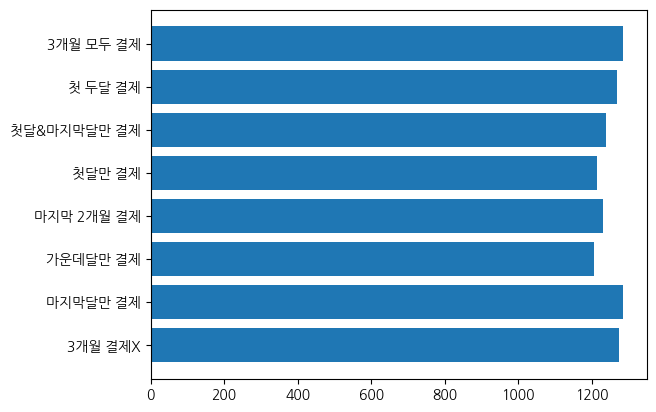

In [54]:
#payment_pattern 그래프
x = ['3개월 결제X' , '마지막달만 결제', '가운데달만 결제', '마지막 2개월 결제', '첫달만 결제','첫달&마지막달만 결제','첫 두달 결제','3개월 모두 결제']
plt.barh(x, pymt_counts.values)

In [41]:
#target count
target_counts = df.groupby('target')['user_id'].count()
target_counts

target
0    3801
1    6199
Name: user_id, dtype: int64

<BarContainer object of 2 artists>

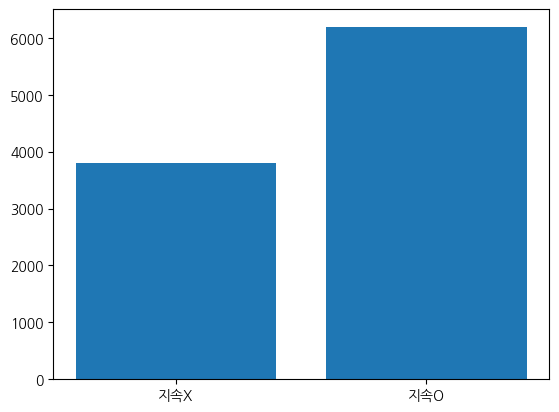

In [50]:
#target 그래프
x = ['지속X' , '지속O']
plt.bar(x, target_counts.values)

In [208]:
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [210]:
df.groupby('target')['user_id'].count()

target
0    3801
1    6199
Name: user_id, dtype: int64

In [214]:
df2 = df.groupby('target').describe()
df2

subscription_duration                                                   \
                       count       mean       std  min  25%   50%   75%   max   
target                                                                          
0                     3801.0  11.953959  6.618295  1.0  6.0  12.0  18.0  23.0   
1                     6199.0  11.862720  6.590500  1.0  6.0  12.0  18.0  23.0   

       recent_login_time             ... customer_inquiry_history        \
                   count       mean  ...                      75%   max   
target                               ...                                  
0                 3801.0  15.057880  ...                      3.0  10.0   
1                 6199.0  14.985804  ...                      3.0   8.0   

       payment_pattern                                               
                 count      mean       std  min  25%  50%  75%  max  
target                                                               
0               3801.0  3.506972  2.302291  0.0  1.0  4.0  6.0  7.0  
1               6199.0  3.500403  2.316925  0.0  1.0  3.0  6.0  7.0  

[2 rows x 88 columns]

In [216]:
target_df = df[['target','subscription_duration','average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement','community_engagement_level']]
target_df.set_index('target')

,subscription_duration,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,community_engagement_level
target,,,,,,
0,13,8.427187,18,16,68.360455,4
1,16,72.646087,16,13,97.567322,3
1,22,21.774492,13,14,94.358763,4
1,1,42.659066,19,18,70.153228,3
1,4,30.744287,19,10,81.917908,4
...,...,...,...,...,...,...
1,22,84.053558,18,16,64.966803,5
1,10,45.464833,9,8,82.750244,3
1,7,127.302411,24,14,81.567839,5


In [219]:
target_df.groupby(target_df.index).describe().T

KeyboardInterrupt: 

In [ ]:
df[['payment_pattern','subscription_duration', 'average_time_per_learning_session','monthly_active_learning_days','total_completed_courses','recent_learning_achievement','community_engagement_level']]